In [1]:
import pandas as pd
import matplotlib.pyplot as plt


sales=pd.read_excel(r"supermarket_sales.xlsx")

sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


In [2]:
sales["Product line"]

0          Food_and_beverages
1         Fashion_accessories
2      Electronic_accessories
3           Sports_and_travel
4          Home_and_lifestyle
                ...          
995        Food_and_beverages
996    Electronic_accessories
997        Food_and_beverages
998        Home_and_lifestyle
999       Fashion_accessories
Name: Product line, Length: 1000, dtype: object

In [3]:
#Question 1: which city has more female member?

sales.groupby(["City", "Gender"]).count()

Invoice ID  Branch  Customer type  Product line  Unit price  \
City      Gender                                                                
Mandalay  Female         162     162            162           162         162   
          Male           170     170            170           170         170   
Naypyitaw Female         178     178            178           178         178   
          Male           150     150            150           150         150   
Yangon    Female         161     161            161           161         161   
          Male           179     179            179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
City      Gender                                                       
Mandalay  Female       162     162    162   162   162      162   162   
          Male         170     170    170   170   170      170   170   
Naypyitaw Female       178     178    178   178   178      178   178   
          Male         150     150    150   150   150      150   150   
Yangon    Female       161     161    161   161   161      161   161   
          Male         179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
City      Gender                                                 
Mandalay  Female                      162           162     162  
          Male                        170           170     170  
Naypyitaw Female                      178           178     178  
          Male                        150           150     150  
Yangon    Female                      161           161     161  
          Male                        179           179     179

In [4]:
female_member=sales.groupby(["Gender", "City"]).count()["Customer type"]
print(female_member)

Gender  City     
Female  Mandalay     162
        Naypyitaw    178
        Yangon       161
Male    Mandalay     170
        Naypyitaw    150
        Yangon       179
Name: Customer type, dtype: int64


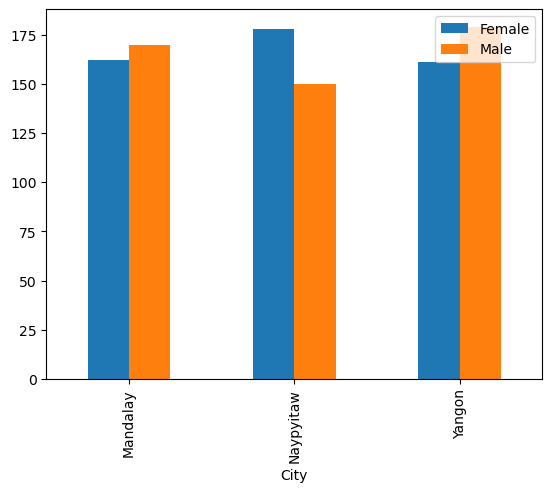

In [5]:
female_member.unstack(level=0).plot(kind="bar")
plt.legend(loc="upper right")

In [6]:
#Question 2: who spend more? men or women?

sales.groupby("Gender")["Total"].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

<Axes: xlabel='Gender'>

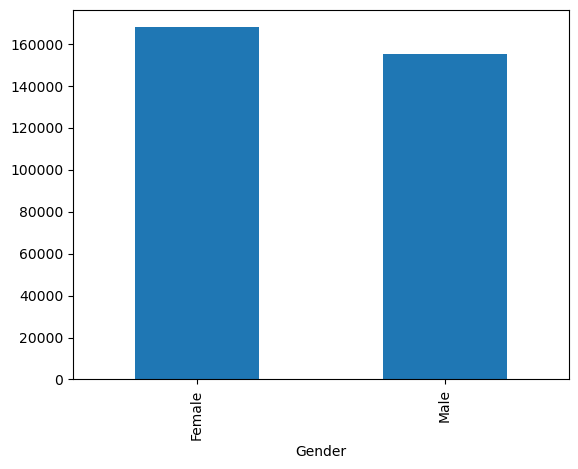

In [7]:
spend=sales.groupby("Gender")["Total"].sum()
spend.plot(kind="bar")

In [8]:
#Question 3: which types of customer spend more? member or normal?

sales.groupby("Customer type")["Total"].sum()


Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

<Axes: xlabel='Customer type'>

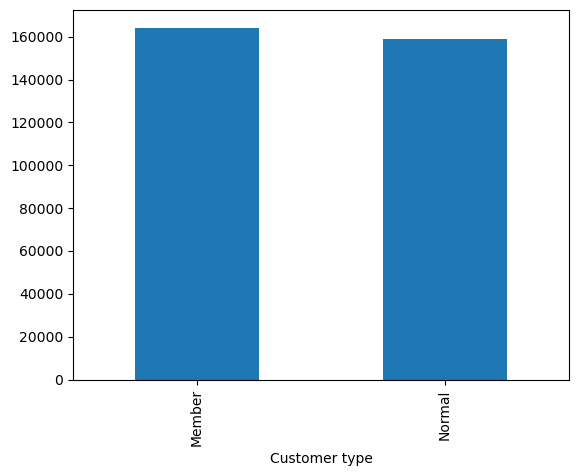

In [9]:
Customer_type=sales.groupby("Customer type")["Total"].sum()
Customer_type.plot(kind="bar")

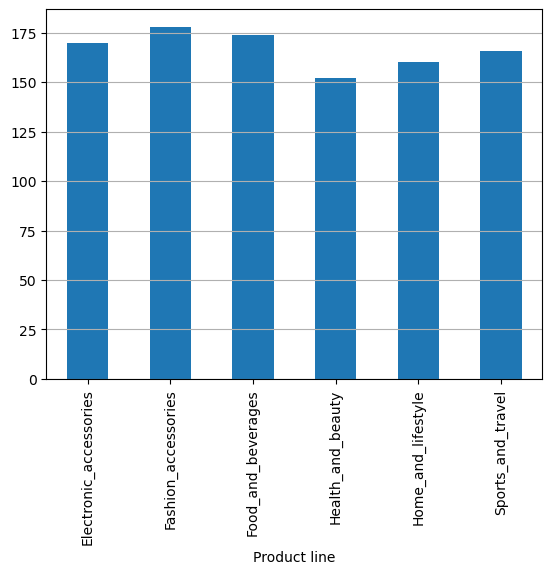

In [10]:
#Question 4: which product line sells more?

Product_line=sales.groupby("Product line").count()["Invoice ID"]
Product_line.plot(kind="bar")
plt.grid(axis="y")

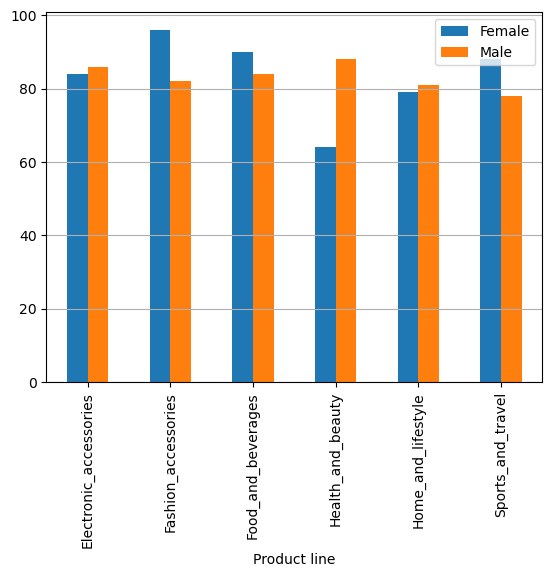

In [11]:
#Question 5: which product line is more popular among men and women?

sales.groupby(["Gender", "Product line"]).count()["Invoice ID"]
more_popular=sales.groupby(["Gender", "Product line"]).count()["Invoice ID"]
more_popular.unstack(level=0).plot(kind="bar")
plt.legend(loc="upper right")
plt.grid(axis="y")

In [12]:
#Question 6: what days of the month make most sales?
#Question 7: what month makes most sales?

sales["Date"]

0                2/20/2019
1      2019-06-02 00:00:00
2      2019-09-03 00:00:00
3                1/15/2019
4      2019-11-03 00:00:00
              ...         
995              3/22/2019
996    2019-10-03 00:00:00
997    2019-09-02 00:00:00
998              2/22/2019
999              2/18/2019
Name: Date, Length: 1000, dtype: object

In [13]:
pd.to_datetime(sales["Date"])

0     2019-02-20
1     2019-06-02
2     2019-09-03
3     2019-01-15
4     2019-11-03
         ...    
995   2019-03-22
996   2019-10-03
997   2019-09-02
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [14]:
pd.to_datetime(sales["Date"]).dt.day
pd.to_datetime(sales["Date"]).dt.month
sales["Day"]=pd.to_datetime(sales["Date"]).dt.day
sales["Month"]=pd.to_datetime(sales["Date"]).dt.month
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9,20,2
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5,2,6
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8,3,9
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5,15,1
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4,3,11


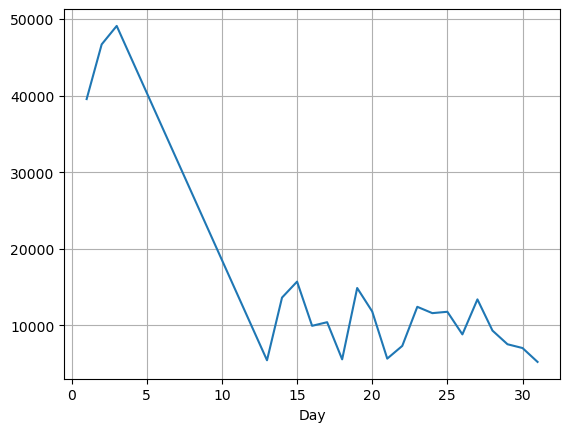

In [15]:
sales.groupby("Day")["Total"].sum().plot()
plt.grid()

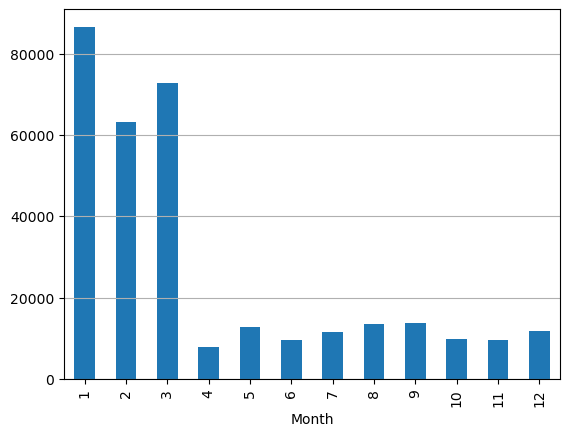

In [16]:
sales.groupby("Month")["Total"].sum().plot(kind="bar")
plt.grid(axis="y")

In [17]:
# Question 8: what hour makes the most sales?
sales["Date"]

0                2/20/2019
1      2019-06-02 00:00:00
2      2019-09-03 00:00:00
3                1/15/2019
4      2019-11-03 00:00:00
              ...         
995              3/22/2019
996    2019-10-03 00:00:00
997    2019-09-02 00:00:00
998              2/22/2019
999              2/18/2019
Name: Date, Length: 1000, dtype: object

In [18]:
sales['Date'] = pd.to_datetime(sales['Date']).dt.date
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2019-02-20,13:27:00,Credit card,164.52,4.761905,8.226,5.9,20,2
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02,18:07:00,Ewallet,57.92,4.761905,2.896,4.5,2,6
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03,17:03:00,Cash,102.04,4.761905,5.102,6.8,3,9
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,2019-01-15,16:19:00,Cash,562.32,4.761905,28.116,4.5,15,1
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03,15:30:00,Ewallet,80.60,4.761905,4.030,4.4,3,11


In [19]:
sales["Time"]

0      13:27:00
1      18:07:00
2      17:03:00
3      16:19:00
4      15:30:00
         ...   
995    19:06:00
996    20:46:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Time, Length: 1000, dtype: object

In [24]:
sales['Time'] = pd.to_datetime(sales['Time'], format='%H:%M:%S')

sales['Hour'] = sales['Time'].dt.hour

sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2019-02-20,1900-01-01 13:27:00,Credit card,164.52,4.761905,8.226,5.9,20,2,13
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02,1900-01-01 18:07:00,Ewallet,57.92,4.761905,2.896,4.5,2,6,18
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03,1900-01-01 17:03:00,Cash,102.04,4.761905,5.102,6.8,3,9,17
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,2019-01-15,1900-01-01 16:19:00,Cash,562.32,4.761905,28.116,4.5,15,1,16
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03,1900-01-01 15:30:00,Ewallet,80.60,4.761905,4.030,4.4,3,11,15


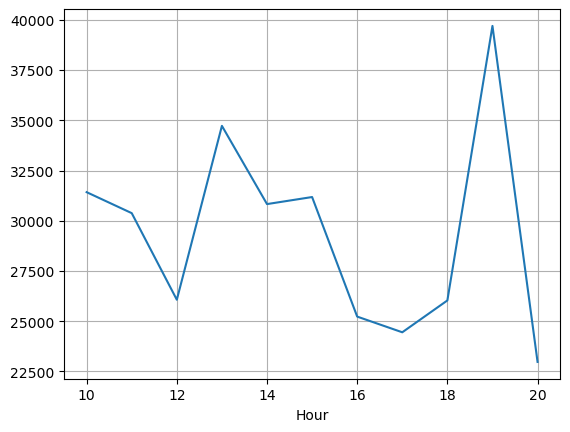

In [26]:
sales.groupby("Hour")["Total"].sum().plot()
plt.grid()

In [27]:
# question 9: what time do people make more e-payment vs. what time do people make more cash payment?

sales.groupby(["Payment", "Hour"]).count()["Gender"]

Payment      Hour
Cash         10      39
             11      34
             12      29
             13      40
             14      27
             15      35
             16      23
             17      29
             18      30
             19      35
             20      23
Credit card  10      35
             11      25
             12      30
             13      27
             14      25
             15      30
             16      21
             17      27
             18      31
             19      36
             20      24
Ewallet      10      27
             11      31
             12      30
             13      36
             14      31
             15      37
             16      33
             17      18
             18      32
             19      42
             20      28
Name: Gender, dtype: int64

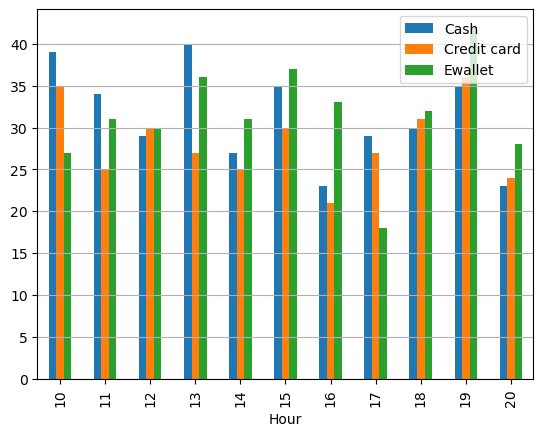

In [28]:
sales.groupby(["Payment", "Hour"]).count()["Gender"].unstack(level=0).plot(kind="bar")
plt.grid(axis="y")
plt.legend(loc="upper right")

<Axes: xlabel='City'>

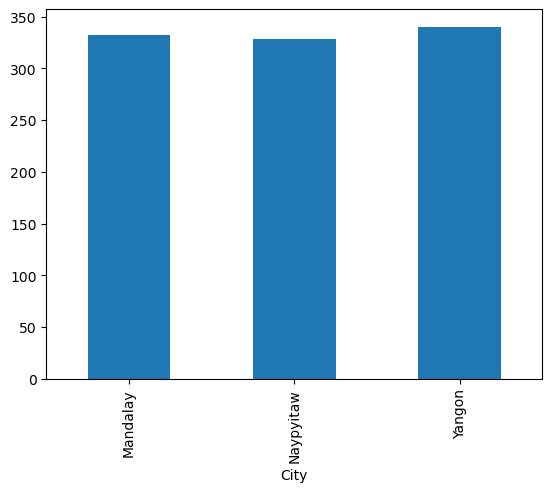

In [32]:
# question 10: which city has the best ratings?
ratings= sales.groupby("City").count()["Rating"]
ratings.plot(kind="bar")